## UCB algorithm

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
def ucb(k = 10, timesteps = 1000, runs = 500):
    
    q_star = np.random.normal(0, 1, (runs, k))    # Generated values for the k-armed bandits

    S = np.zeros((runs, k))    # Knowledge of sum reward
    N = np.ones((runs, k))    # Number of previously used values (to calculate Q correctly)
    R = []    # Array of average reward per step

    for timestep in range(timesteps):
        R_t = []    # Array of rewards on the current step
        for problem in range(runs):
            maximum_ucb=0
            A_t = -1
            for a_t in range(k):
                if (N[problem, a_t] > 0):
                    r_a = q_star[problem, a_t]    # Current reward of an arm
                    n_a = N[problem, a_t] + 1
                    av_a = (S[problem, a_t] + r_a)/n_a
                    ucb_a = av_a + math.sqrt(2 * math.log(problem+1)/n_a)
                else:
                    ucb_a = 1e400 # Set ucb some small constant number because we can't estimate until an arm will be chosen
                if ucb_a > maximum_ucb:
                    maximum_ucb = ucb_a
                    A_t = a_t        
            R_current = q_star[problem, A_t]    # Current reward
            R_t.append(R_current)
            N[problem, A_t] += 1
            S[problem, A_t] += R_current

        R.append(np.mean(R_t))
        
    return R

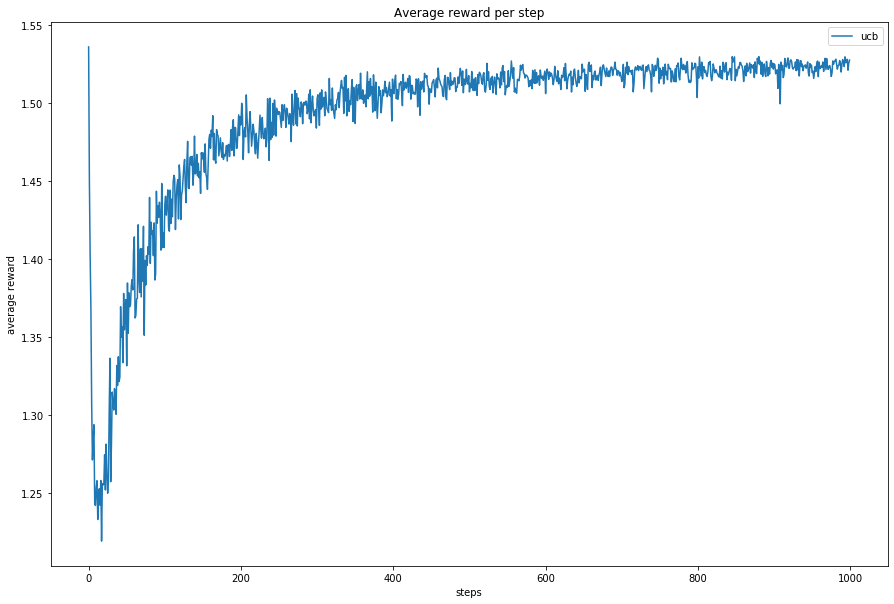

In [34]:
R = ucb()
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(R, label="ucb")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.title("Average reward per step")
plt.legend()
plt.show()

## Thompson algorithm

In [49]:
# Goal is to maximize payout from 2 unfair coins"
N = 2  # number machines
means = np.array([0.7, 0.5])  # prob of a win, each coins
probs = np.zeros(N)  # sampling prob win, each machine
S = np.zeros(N, dtype=np.int)  # number successes each machine
F = np.zeros(N, dtype=np.int)  # number failures each machine
rnd = np.random.RandomState(7)  # for machine payouts and Beta

for trial in range(10):
    print("\ntrial " + str(trial))
    for i in range(N): 
        probs[i] = rnd.beta(S[i] + 1, F[i] + 1)

    print("sampling probs =  ", end="")
    for i in range(N):
        print("%0.4f  " % probs[i], end="")
        print("")
        A_t = np.argmax(probs)
        print("chose coin " + str(A_t), end="")

        p = rnd.random_sample()  # [0.0, 1.0)
        if p < means[A_t]:
            print(" - win")
            S[A_t] += 1
        else:
            print(" - lose")
            F[A_t] += 1

print("\nfinal Success vector: ", end="")
print(S)
print("final Failure vector: ", end="")
print(F)


trial 0
sampling probs =  0.0891  
chose coin 1 - win
0.8743  
chose coin 1 - win

trial 1
sampling probs =  0.8525  
chose coin 1 - lose
0.8561  
chose coin 1 - win

trial 2
sampling probs =  0.2957  
chose coin 1 - lose
0.6444  
chose coin 1 - win

trial 3
sampling probs =  0.2945  
chose coin 1 - lose
0.8633  
chose coin 1 - win

trial 4
sampling probs =  0.6747  
chose coin 0 - win
0.4115  
chose coin 0 - lose

trial 5
sampling probs =  0.3202  
chose coin 1 - win
0.9419  
chose coin 1 - lose

trial 6
sampling probs =  0.5896  
chose coin 0 - lose
0.5081  
chose coin 0 - lose

trial 7
sampling probs =  0.0450  
chose coin 1 - win
0.4084  
chose coin 1 - win

trial 8
sampling probs =  0.3757  
chose coin 1 - win
0.5355  
chose coin 1 - lose

trial 9
sampling probs =  0.3019  
chose coin 1 - lose
0.7078  
chose coin 1 - lose

final Success vector: [1 9]
final Failure vector: [3 7]
